## Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Checking the rows and columns of the dataset
leads.shape

(9240, 37)

There are 9240 rows and 37 columns

In [4]:
#Checking the summary statistics of the numerical variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


There seems to be outliers for some columns.

In [5]:
#Checking the dataset info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see there are some missing values.

## Converting Select to NaN

In [6]:
# Converting "Select" to NaN as they mean the same.
leads = leads.replace('Select',np.nan)

## Check for NULL Values

In [7]:
#Check for null values
round((leads.isnull().sum()/len(leads.index))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Let us drop all the columns that are above 40%.

In [8]:
#drop all columns that have more than 40% null values
leads1 = leads.drop(leads.columns[leads.apply(lambda x:x.isnull().sum()/len(leads.index)*100 > 40)],axis = 1)

## Removing Redundant Variables

**Prospect ID** and **Lead Number** do not help our analysis. So, lets drop them.

In [9]:
# These variables are redundant.
leads1.drop(["Prospect ID","Lead Number"],axis =1, inplace = True)

In [10]:
# Checking for categorical variables with unique values. They are not useful. So, we will drop them.
leads1.nunique().sort_values()

I agree to pay the amount through cheque            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Receive More Updates About Our Courses              1
Magazine                                            1
Search                                              2
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
City                                                6
What is your current occupat

In [11]:
#Dropping the columns with unique values "1" as they are not useful.
leads1.drop(["I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content",
           "Receive More Updates About Our Courses","Magazine"],axis = 1,inplace = True)

In [12]:
cat_list_drop = ["What matters most to you in choosing a course","Country","Do Not Call",'Search',"Newspaper Article",
            "X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]

for category in cat_list_drop:
    print(leads1[category].value_counts())
    print("-------------------------------")


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
-------------------------------
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Bangladesh                 2
Netherlands                2
Belgium                    2
Italy                      2
Uganda                     2
Ghana                      2
Philippines                2
China                      2
Asia/Pacific Regi

In **Country**, **India** is predominantly seen compared to other countries.
In **What matters most to you in choosing a course**, only one aspect **Better Career Prospects** is seen.
In **Do Not Call,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations**, only **No** option is selected.
The above variables where only one value is predominant. So, it does not help our analysis in anyway. So, let's drop them.

In [13]:
leads1.drop(["What matters most to you in choosing a course","Country","Do Not Call",'Search',"Newspaper Article",
            "X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"],axis = 1,inplace = True)

In [14]:
print("Before dropping the columns", leads.shape)
print("After dropping the columns", leads1.shape)

Before dropping the columns (9240, 37)
After dropping the columns (9240, 14)


## Correcting the values and Grouping the values of columns

We need to group some of the values of the columns as they are not significant. They are
**Lead Source, Last Activity, Tags and Last Notable Activity**.
Since, it is not compulsory to group them, we will take care of them later.

In [15]:
# Combining both values which are same
leads1["Lead Source"].replace("google", "Google",inplace = True)

In [16]:
# Grouping all the sources with less value.
leads1["Lead Source"].replace(["bing","Click2call","Social Media","Press_Release","Live Chat","WeLearn","Pay per Click Ads",
                             "testone","NC_EDM","welearnblog_Home","youtubechannel","blog"],"Others",inplace = True)

In [17]:
leads1["Lead Source"].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [18]:
# Grouping all the Last Activities with less value.
leads1["Last Activity"].replace(["Approached upfront","View in browser link Clicked","Email Marked Spam","Email Received",
                              "Resubscribed to emails","Visited Booth in Tradeshow"],"Others",inplace = True)

In [19]:
leads1["Last Activity"].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

In [20]:
# Grouping all the tags with less values.
leads1["Tags"].replace(["Lost to Others","Still Thinking","Want to take admission but has financial problems",
                       "In confusion whether part time or DLP","Interested in Next batch","Lateral student",
                       "Shall take in the next coming month","University not recognized","Recognition issue (DEC approval)"],
                      "Others",inplace = True)

In [21]:
leads1["Tags"].value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Others                                   37
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64

In [22]:
# Grouping all the Last Notable Activities with less values.
leads1["Last Notable Activity"].replace(["Email Marked Spam","Email Received","View in browser link Clicked",
                                         "Form Submitted on Website","Resubscribed to emails","Approached upfront"],
                                        "Others",inplace = True)

In [23]:
leads1["Last Notable Activity"].value_counts()

Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Others                         7
Name: Last Notable Activity, dtype: int64

## Exploratory Data Analysis

## Univariate Analysis

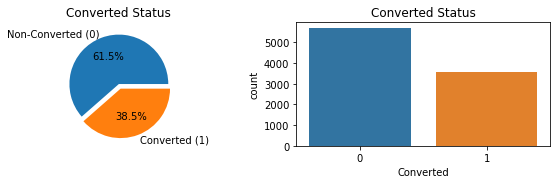

In [24]:
fig = plt.figure(figsize = (10,5))
plt.subplot(2,2,1)
plt.pie(leads1["Converted"].value_counts(normalize = True) * 100,labels = ["Non-Converted (0)","Converted (1)"], explode = [0,0.1],autopct = "%1.1f%%")
plt.title("Converted Status")

plt.subplot(2,2,2)
sns.countplot(leads1['Converted'])

plt.title("Converted Status")
plt.show()

The converted are 38.5% and non-converted as 61.5%. There seems to be some issue we need to address why the remaining are not getting converted.

In [25]:
leads1.columns[leads1.dtypes == "object"]

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

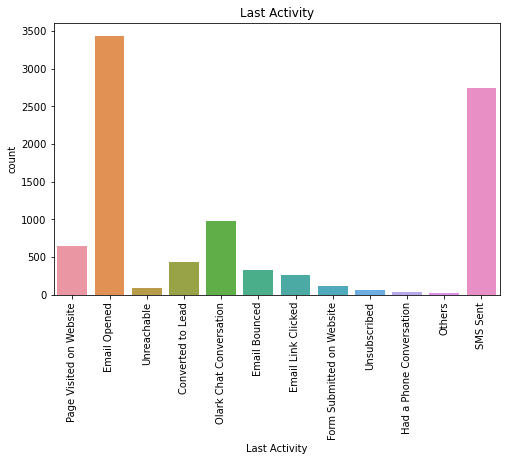

In [26]:
plt.figure(figsize = (8,5))
sns.countplot(data=leads1, x="Last Activity")
plt.xticks(rotation = 90)
plt.title("Last Activity")
plt.show()

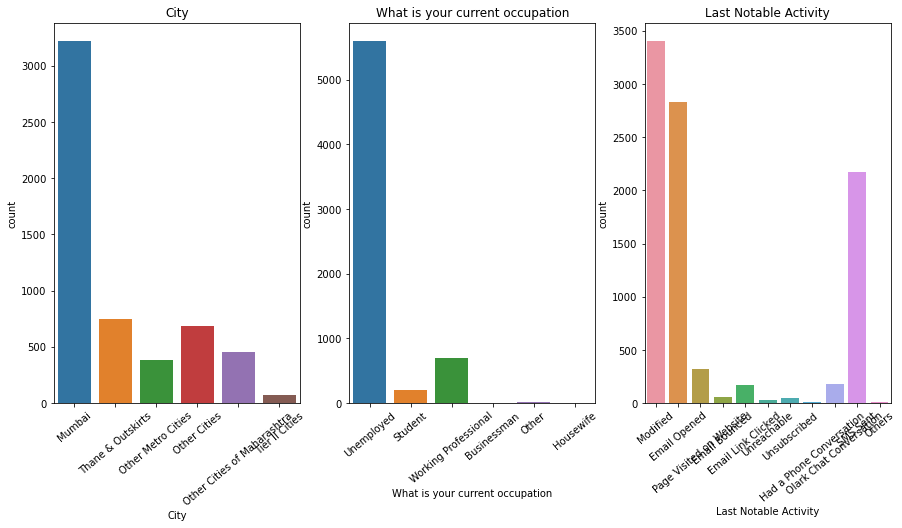

In [27]:
cat_variables0 = ['City','What is your current occupation','Last Notable Activity']
fig = plt.figure(figsize = (15,7))
for i, cat in enumerate(cat_variables0):   
    ax = plt.subplot(1,3,i+1)
    sns.countplot(x = cat,data = leads1)
    plt.xticks(rotation = 40)
    plt.title(cat)
plt.show()

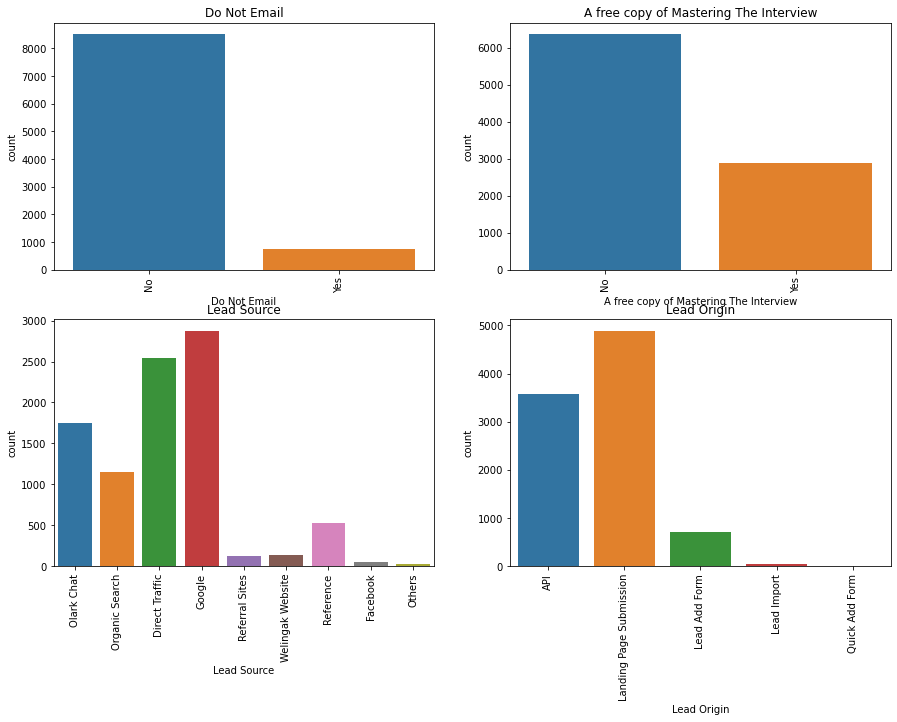

In [28]:
cat_variables = ['Do Not Email','A free copy of Mastering The Interview','Lead Source','Lead Origin']
fig = plt.figure(figsize = (15,10))
for i, cat in enumerate(cat_variables):   
    ax = plt.subplot(2,2,i+1)
    sns.countplot(x = cat,data = leads1)
    plt.xticks(rotation = 90)
    plt.title(cat)
plt.show()

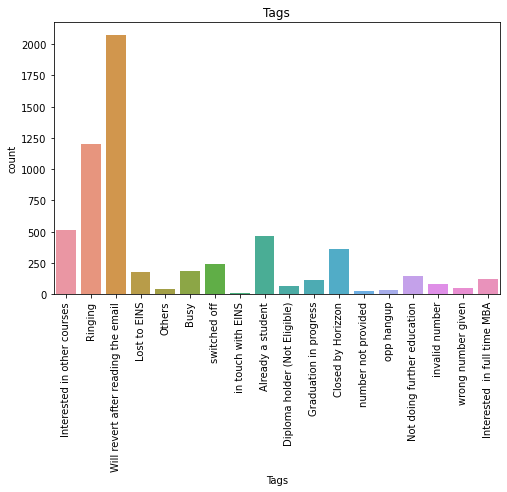

In [29]:
plt.figure(figsize = (8,5))
sns.countplot(data=leads1, x="Tags")
plt.xticks(rotation = 90)
plt.title("Tags")
plt.show()

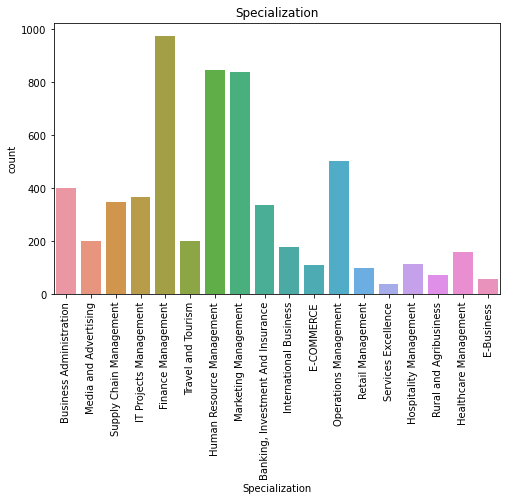

In [30]:
plt.figure(figsize = (8,5))
sns.countplot(data=leads1, x="Specialization")
plt.xticks(rotation = 90)
plt.title("Specialization")
plt.show()

In **Lead Origin**, **landing page submission** is the main component followed by **API** and others.                           
In **Lead Source**, **Google** tops the list followed by **Direct Traffic** and others.                                         
People opted for **No** than **yes** for **Do not Email**.                                                             
People looking for such portals are mainly **Unemployed** followed by **Working Professional**.                                 People did not reach this portal by **Search**, **Education Forums**,**Newspaper** or **Digital Advertisement** or **through recommendations** as they say **No** to it.                                                                                     
Most of them are from **Mumbai**.                                                                                              
Most of them did not want a **free copy of mastering interview** though they are few said **yes**.                        
Most of them have **modified** the **last notable activity** and some are **email opened** and **sms sent**.                 
Their **last activity** is **email opened** followed by **sms sent** and others.                                            
Their **Specialization** is mainly for **Finance Management** followed by many which are almost equal like **Human Resource Management** and **Marketing Management**. Seems like all management courses top the list.                                     
And, most of them have **tags** with **Will revert after reading the email** and **Ringing**. This could be the reason why people either get converted or not. We need to see in the bivariate analysis with the target variable later.


### Numerical Variables

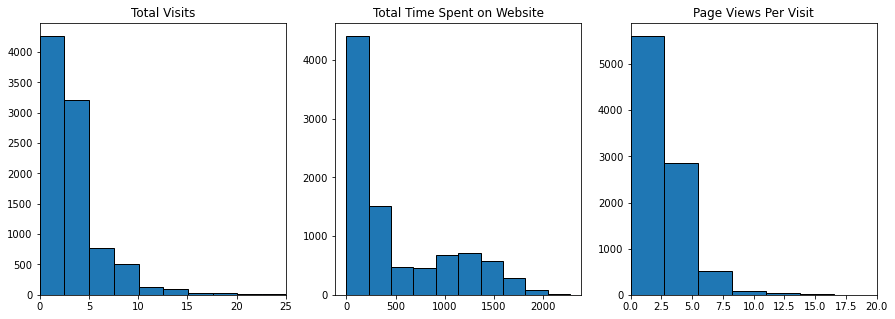

In [31]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.hist(leads1['TotalVisits'], bins = 100,edgecolor = "black")
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(1,3,2)
plt.hist(leads1['Total Time Spent on Website'], bins = 10,edgecolor = "black")
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
plt.hist(leads1['Page Views Per Visit'], bins = 20,edgecolor = "black")
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

**Total Visits** seems to be more. But, when we see the **total time spent on website** seems to be less which can be the reason when they do not convert. And, even **page views per visit** are also more.

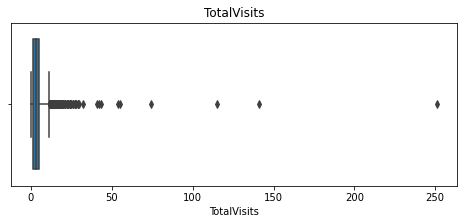

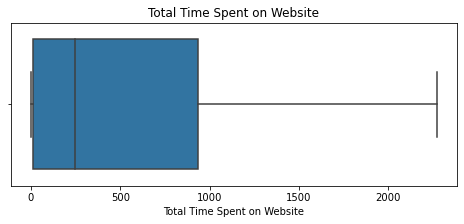

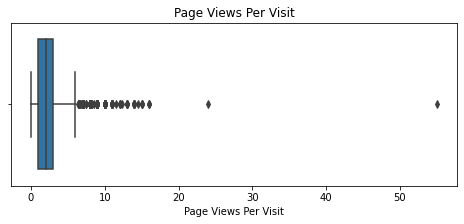

In [32]:
num_list = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

for num in leads1[num_list]:
    fig = plt.figure(figsize = (8,3))
    sns.boxplot(leads1[num])
    plt.title(num)
    plt.show()

There seems to be some outliers for **Total Visits** and **Page Views per Visit**.

## Bivariate Analysis

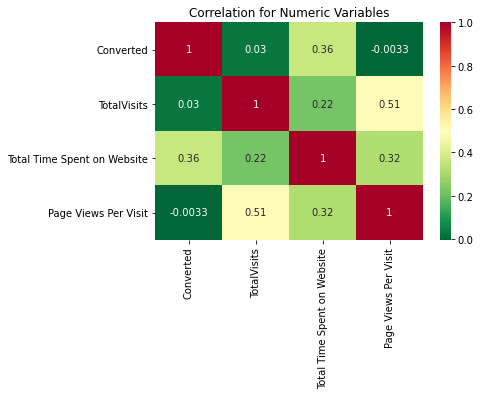

In [33]:
# Checking the correlations for numerical variables
num_biv_anal = leads1[["Converted","TotalVisits","Total Time Spent on Website","Page Views Per Visit"]].corr()

sns.heatmap(num_biv_anal,annot = True, cmap = "RdYlGn_r")
plt.title("Correlation for Numeric Variables")
plt.show()

No significant correlations among the numeric variables. But, **Page Views Per Visit** is slightly negatively correlated to **Converted**.

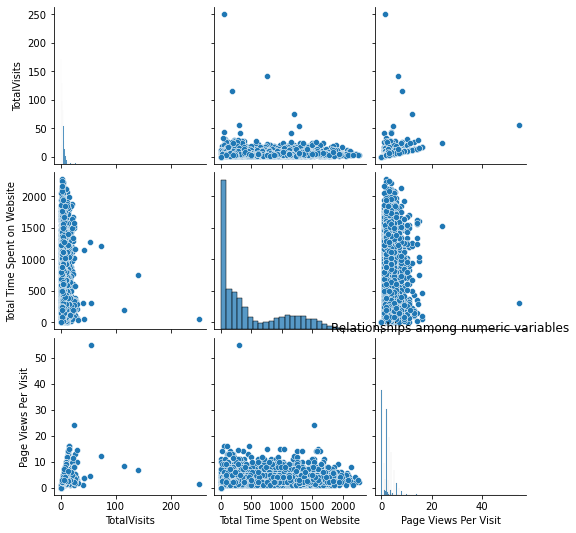

In [34]:
sns.pairplot(data = leads1, vars = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"])
plt.title("Relationships among numeric variables")
plt.show()

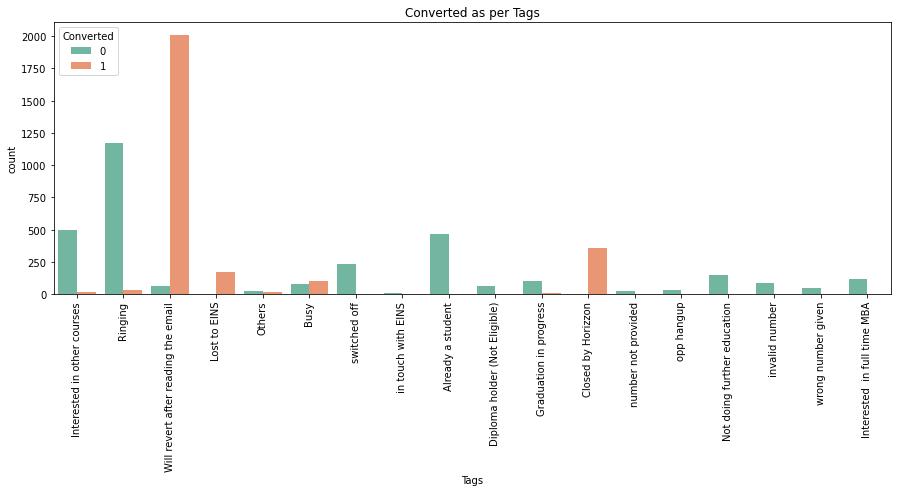

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(data=leads1, x="Tags", hue="Converted",palette = "Set2")
plt.xticks(rotation = 90)
plt.title("Converted as per Tags")
plt.show()

People who said they **Will revert after reading the email** and **closed by horizon** got converted. They are genuine learners. And, who say they are **Interested in the course** but do not pick the calls (**ringing**) and if they are **already a student** are the main reasons for non-conversion.

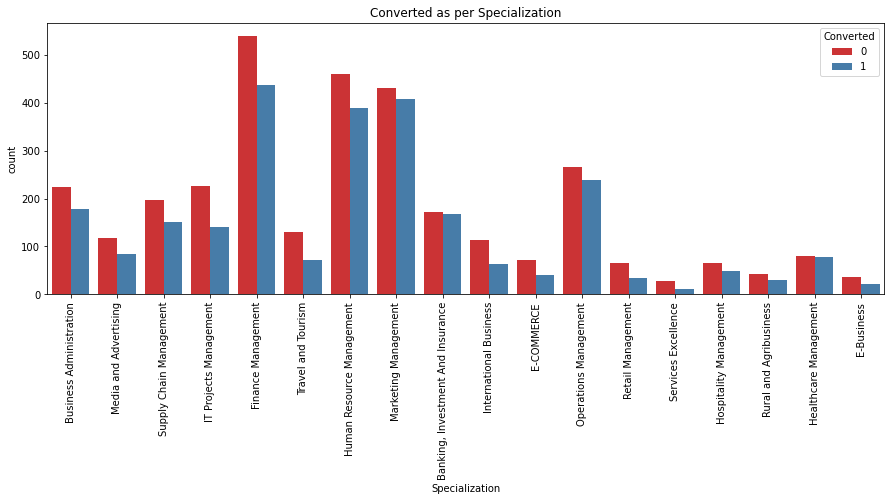

In [36]:
plt.figure(figsize = (15,5))
sns.countplot(data=leads1, x="Specialization", hue="Converted",palette = "Set1")
plt.xticks(rotation = 90)
plt.title("Converted as per Specialization")
plt.show()

Learners who opted for **Finance Management** are high in **conversion** and **non conversion**. Followed by all management specializations.

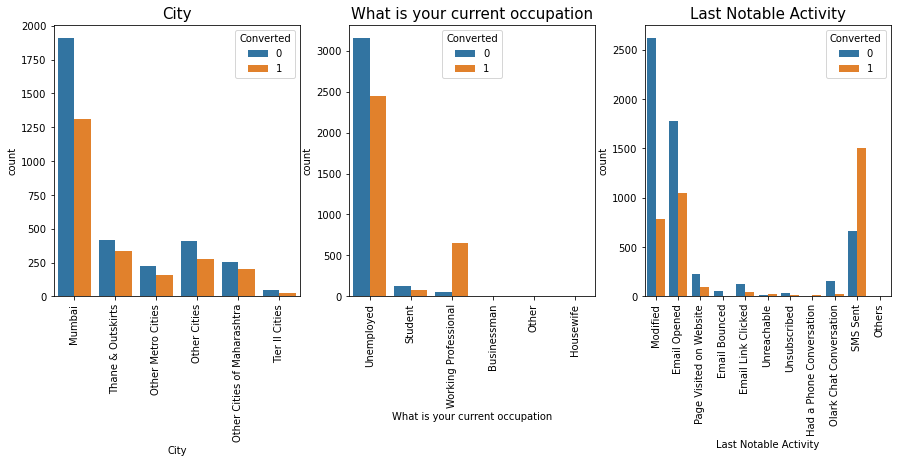

In [37]:
fig = plt.figure(figsize = (15,5))
cat_variables3 = ['City','What is your current occupation','Last Notable Activity']
for num, cat in enumerate(cat_variables3):
    ax = plt.subplot(1,3,num+1)
    sns.countplot(data = leads1,x = cat, hue = "Converted")
    plt.xticks(rotation = 90)
    plt.title(cat,fontsize = 15)
plt.show()

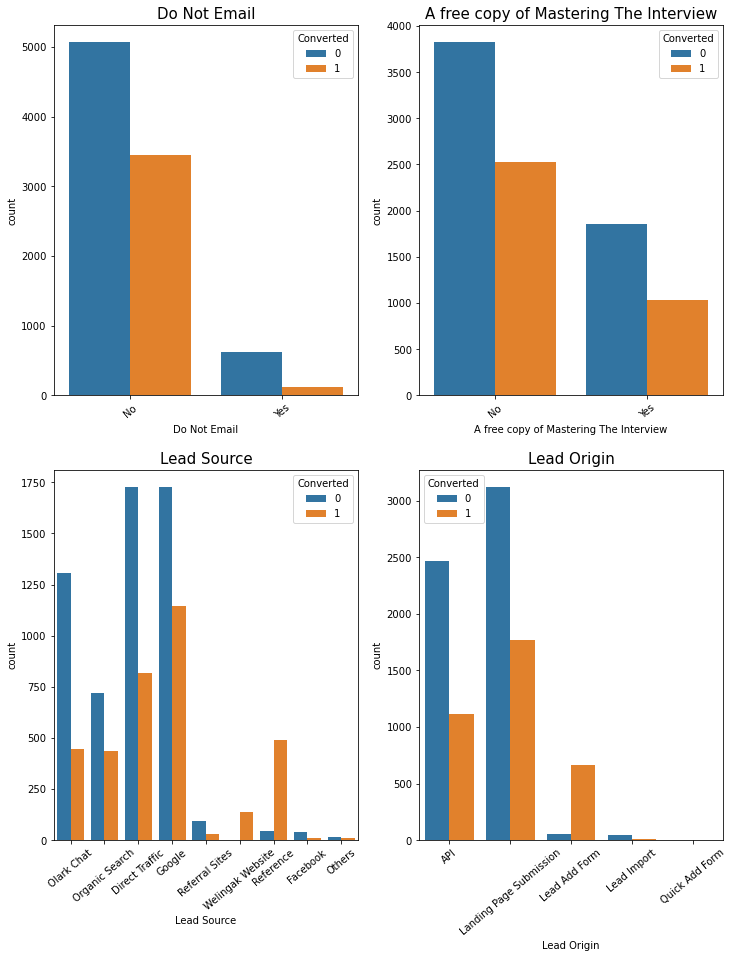

In [38]:
fig = plt.figure(figsize = (12,15))
cat_variables1 = ['Do Not Email','A free copy of Mastering The Interview','Lead Source','Lead Origin']
for num, cat in enumerate(cat_variables1):
    ax = plt.subplot(2,2,num+1)
    sns.countplot(data = leads1,x = cat, hue = "Converted")
    plt.xticks(rotation = 40)
    plt.title(cat,fontsize = 15)
plt.show()

**Landing Page Submission** have more converted and non converted followed by **API** and others.                              
People who got the source from **Direct Traffic** and **Google** have almost equal non conversions but **google** has more conersions.
People who said **No** to **Do not Email** have landed up taking the courses.
As said earlier, **Unemployed** and **Working Professional** are more in both.
Almost all cities have conversions and non conversions.
People with **a free copy of mastering interview** have low conversions and high non conversions.
**SMS sent** are mainly converted in **last notable activity** and **last activity**.

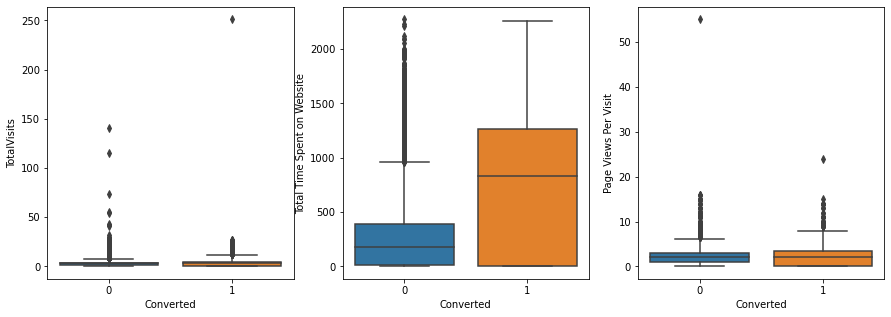

In [39]:
num_list = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

plt.figure(figsize=(15, 5))
for var in num_list:
    plt.subplot(1,3,num_list.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = leads1)
plt.show()

Learners who **spent more time on website** got converted more.

## Creating Dummy Variables

In [40]:
# Creating dummies for all categorical variables
leads2 = pd.get_dummies(leads1,drop_first = True)
leads2.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
# Getting the status of rows and columns just to check we do not drop too many rows and columns.
print("Before dropping the columns", leads.shape)
print("After dropping the columns", leads1.shape)
print("After creating dummies", leads2.shape)

Before dropping the columns (9240, 37)
After dropping the columns (9240, 14)
After creating dummies (9240, 83)


In [42]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 83 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_Lead Import                               9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                            9240 non-null   uint8  
 8   Lead Source_Facebook                                  9240

## Splitting the Data into Training and Testing Sets

In [43]:
#Using train_test_split to split the dataset and splitting into 70% and 30%
from sklearn.model_selection import train_test_split

In [44]:
# Putting response variable to y
y = leads2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
X=leads2.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [47]:
#Printing the rows and columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 82)
(2772, 82)
(6468,)
(2772,)


## Missing Values for X_train

In [48]:
#Check for null values
round((X_train.isnull().sum()/len(X_train.index))*100,2).sort_values(ascending = False).head(10)

TotalVisits                                 1.53
Page Views Per Visit                        1.53
Tags_Graduation in progress                 0.00
Tags_in touch with EINS                     0.00
Tags_Will revert after reading the email    0.00
Tags_Ringing                                0.00
Tags_Others                                 0.00
Tags_Not doing further education            0.00
Tags_Lost to EINS                           0.00
Tags_Interested in other courses            0.00
dtype: float64

For the below variables, We cannot impute the NA values with Median as the values are skewed. So, using mode to impute them.

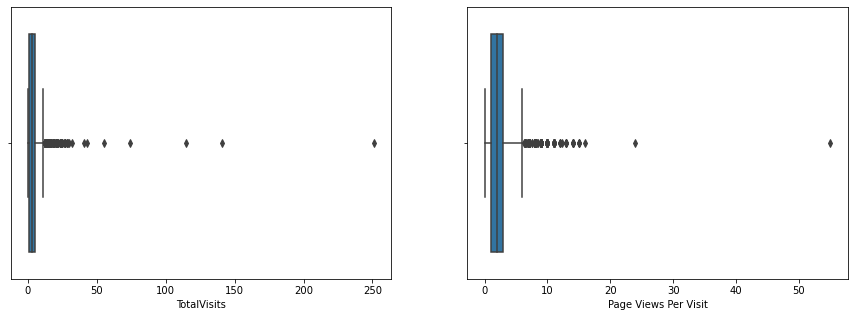

In [49]:
num_lst = ["TotalVisits","Page Views Per Visit"]

plt.figure(figsize=(15, 5))
for var in num_lst:
    plt.subplot(1,2,num_lst.index(var)+1)
    sns.boxplot(x = var, data = X_train)
plt.show()

In [50]:
X_train["TotalVisits"] = X_train["TotalVisits"].fillna(X_train["TotalVisits"].mode()[0])
X_train["Page Views Per Visit"] = X_train["Page Views Per Visit"].fillna(X_train["Page Views Per Visit"].mode()[0])

In [51]:
#Check for null values
round((X_train.isnull().sum()/len(X_train.index))*100,2).sort_values(ascending = False)

TotalVisits                                 0.0
Tags_invalid number                         0.0
Tags_Will revert after reading the email    0.0
Tags_Ringing                                0.0
Tags_Others                                 0.0
                                           ... 
Last Activity_Unsubscribed                  0.0
Last Activity_Unreachable                   0.0
Last Activity_SMS Sent                      0.0
Last Activity_Page Visited on Website       0.0
Last Notable Activity_Unsubscribed          0.0
Length: 82, dtype: float64

## Feature Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[num_list] = scaler.fit_transform(X_train[num_list])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


Let us check for correlations to drop highly correlated variables.

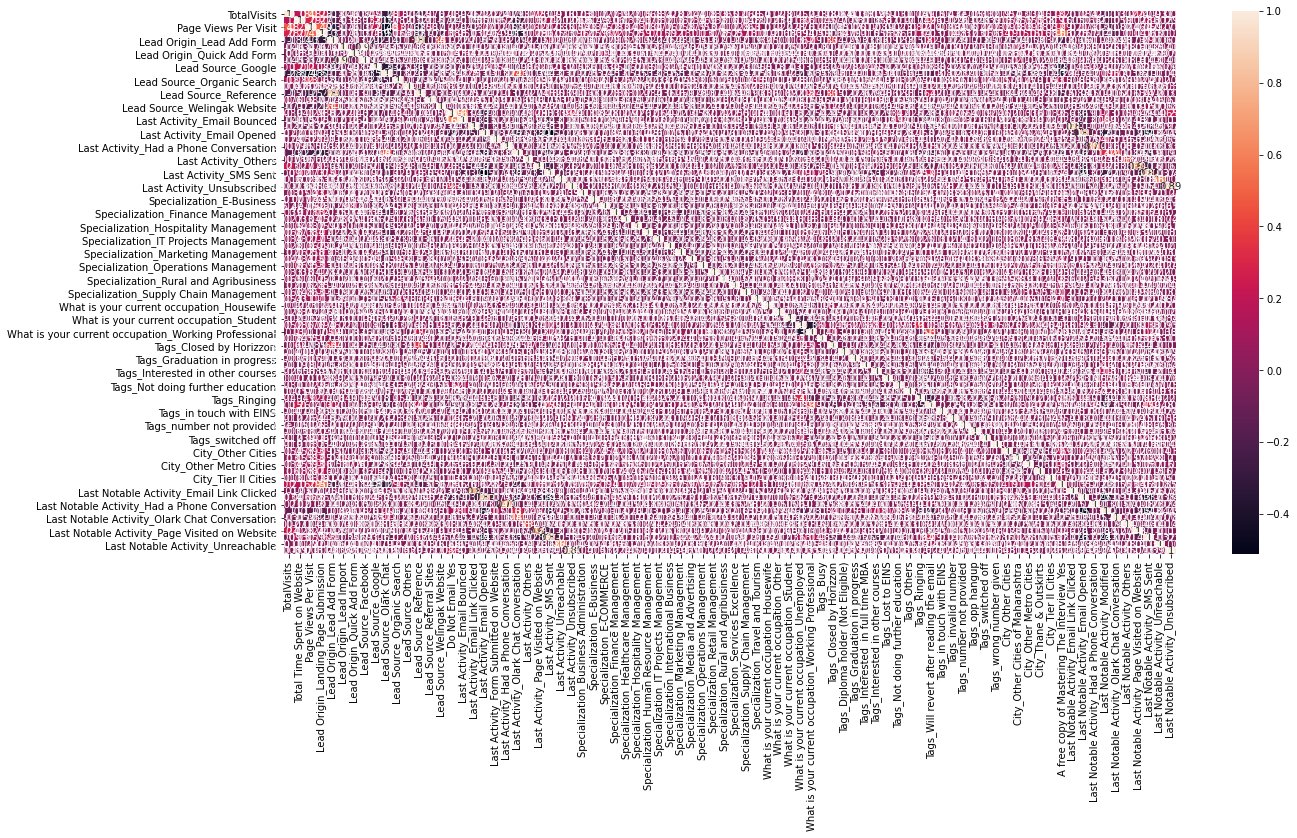

In [53]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Since there are too many variables, it is tough to identify the correlations. So, let us proceed with model building and we can take care of feature selection in RFE.

## Model Building

In [54]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [55]:
# Import RFE
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
#Get an array of true and false of the columns
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False])

In [57]:
#Create a list of columns and their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', False, 13),
 ('Lead Origin_Lead Import', False, 66),
 ('Lead Origin_Quick Add Form', False, 37),
 ('Lead Source_Facebook', False, 30),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Source_Others', False, 39),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 59),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', False, 12),
 ('Last Activity_Email Bounced', False, 43),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 25),
 ('Last Activity_Form Submitted on Website', False, 21),
 ('Last Activity_Had a Phone Conversation', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 31),
 ('Last Activity_Others', False, 16),
 ('Last Act

In [58]:
#These are the columns that are considered after rfe
col = X_train.columns[rfe.support_]

In [59]:
#These are the columns that are excluded after rfe
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
 

##### Assessing the model with StatsModels

## Model 1

In [60]:
# Importing statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1350.8
Date:                Tue, 15 Nov 2022   Deviance:                       2701.6
Time:                        20:55:52   Pearson chi2:                 1.28e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2074      0.090    -24.652      0.000      -2.383      -2.032
Total Time Spent on Website                  3.3430      0.207     16.154      0.000       2.937       3.749
Lead Source_Welingak Website                 5.2418      0.741      7.070      0.000       3.789       6.695
Last Activity_SMS Sent                       2.1807      0.111     19.696      0.000       1.964       2.398
Tags_Closed by Horizzon                      8.1814      1.011      8.089      0.000       6.199      10.164
Tags_Diploma holder (Not Eligible)         -22.8259   1.73e+04     -0.001      0.999   -3.39e+04    3.39e+04
Tags_Interested in other courses            -1.5032      0.346     -4.341      0.000      -2.182      -0.825
Tags_Lost to EINS                            6.4377      0.732      8.792      0.000       5.003       7.873
Tags_Not doing further education            -2.8391      1.018     -2.788      0.005      -4.835      -0.843
Tags_Ringing                                -3.4075      0.229    -14.852      0.000      -3.857      -2.958
Tags_Will revert after reading the email     4.7810      0.177     27.030      0.000       4.434       5.128
Tags_invalid number                         -3.9800      1.084     -3.670      0.000      -6.106      -1.854
Tags_number not provided                   -24.0091   2.47e+04     -0.001      0.999   -4.84e+04    4.84e+04
Tags_switched off                           -3.6603      0.524     -6.991      0.000      -4.687      -2.634
Tags_wrong number given                    -24.1425   2.06e+04     -0.001      0.999   -4.04e+04    4.04e+04
Last Notable Activity_Modified              -1.7604      0.121    -14.568      0.000      -1.997      -1.524
============================================================================================================
"""

The p-values for all variables seems fine except for **Tags_Diploma holder (Not Eligible)**, **ags_number not provided** and **Tags_wrong number given**. Let us check VIF and take decision which ones to remove.

In [61]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.71
9,Tags_Will revert after reading the email,1.53
2,Last Activity_SMS Sent,1.50
14,Last Notable Activity_Modified,1.32
8,Tags_Ringing,1.13
5,Tags_Interested in other courses,1.11
3,Tags_Closed by Horizzon,1.10
6,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.03
7,Tags_Not doing further education,1.03


VIF values seems fine. Let us drop the variables with high p values - **Tags_wrong number given**.

## Model 2

In [63]:
#Drop Tags_wrong number given column from same col list
col = col.drop('Tags_wrong number given',1)

In [64]:
# Running the model again dropping the variable
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1364.7
Date:                Tue, 15 Nov 2022   Deviance:                       2729.4
Time:                        20:55:53   Pearson chi2:                 1.24e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2230      0.089    -24.852      0.000      -2.398      -2.048
Total Time Spent on Website                  3.3265      0.206     16.183      0.000       2.924       3.729
Lead Source_Welingak Website                 5.2561      0.741      7.096      0.000       3.804       6.708
Last Activity_SMS Sent                       2.1419      0.110     19.557      0.000       1.927       2.357
Tags_Closed by Horizzon                      8.1805      1.011      8.089      0.000       6.198      10.163
Tags_Diploma holder (Not Eligible)         -22.8049   1.73e+04     -0.001      0.999    -3.4e+04    3.39e+04
Tags_Interested in other courses            -1.4797      0.345     -4.287      0.000      -2.156      -0.803
Tags_Lost to EINS                            6.4392      0.732      8.798      0.000       5.005       7.874
Tags_Not doing further education            -2.8153      1.018     -2.766      0.006      -4.810      -0.820
Tags_Ringing                                -3.3544      0.229    -14.678      0.000      -3.802      -2.906
Tags_Will revert after reading the email     4.7928      0.176     27.168      0.000       4.447       5.139
Tags_invalid number                         -3.9239      1.083     -3.624      0.000      -6.046      -1.802
Tags_number not provided                   -23.9599   2.47e+04     -0.001      0.999   -4.85e+04    4.85e+04
Tags_switched off                           -3.6072      0.523     -6.896      0.000      -4.632      -2.582
Last Notable Activity_Modified              -1.7382      0.120    -14.453      0.000      -1.974      -1.502
============================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.70
9,Tags_Will revert after reading the email,1.53
2,Last Activity_SMS Sent,1.49
13,Last Notable Activity_Modified,1.32
8,Tags_Ringing,1.13
5,Tags_Interested in other courses,1.11
3,Tags_Closed by Horizzon,1.10
6,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.03
7,Tags_Not doing further education,1.03


## Model 3

In [66]:
#Drop column Tags_number not provided
col = col.drop('Tags_number not provided',1)

In [67]:
# Running the model again dropping the variable
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.7
Date:                Tue, 15 Nov 2022   Deviance:                       2745.5
Time:                        20:55:54   Pearson chi2:                 1.22e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2337      0.089    -24.985      0.000      -2.409      -2.058
Total Time Spent on Website                  3.3206      0.205     16.208      0.000       2.919       3.722
Lead Source_Welingak Website                 5.2650      0.740      7.112      0.000       3.814       6.716
Last Activity_SMS Sent                       2.1213      0.109     19.487      0.000       1.908       2.335
Tags_Closed by Horizzon                      8.1801      1.011      8.089      0.000       6.198      10.162
Tags_Diploma holder (Not Eligible)         -22.7931   1.73e+04     -0.001      0.999    -3.4e+04    3.39e+04
Tags_Interested in other courses            -1.4667      0.345     -4.256      0.000      -2.142      -0.791
Tags_Lost to EINS                            6.4400      0.732      8.801      0.000       5.006       7.874
Tags_Not doing further education            -2.8019      1.018     -2.753      0.006      -4.797      -0.807
Tags_Ringing                                -3.3249      0.228    -14.578      0.000      -3.772      -2.878
Tags_Will revert after reading the email     4.7998      0.176     27.253      0.000       4.455       5.145
Tags_invalid number                         -3.8930      1.082     -3.598      0.000      -6.014      -1.772
Tags_switched off                           -3.5775      0.523     -6.842      0.000      -4.602      -2.553
Last Notable Activity_Modified              -1.7241      0.120    -14.378      0.000      -1.959      -1.489
============================================================================================================
"""

In [68]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.70
9,Tags_Will revert after reading the email,1.53
2,Last Activity_SMS Sent,1.49
12,Last Notable Activity_Modified,1.32
8,Tags_Ringing,1.13
5,Tags_Interested in other courses,1.11
3,Tags_Closed by Horizzon,1.09
6,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.03
7,Tags_Not doing further education,1.03


## Model 4

In [69]:
# Drop column Tags_Diploma holder (Not Eligible)
col = col.drop('Tags_Diploma holder (Not Eligible)',1)

In [70]:
# Running the model again dropping the variable
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1380.2
Date:                Tue, 15 Nov 2022   Deviance:                       2760.3
Time:                        20:55:54   Pearson chi2:                 1.24e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2523      0.089    -25.216      0.000      -2.427      -2.077
Total Time Spent on Website                  3.2878      0.204     16.136      0.000       2.888       3.687
Lead Source_Welingak Website                 5.2821      0.741      7.133      0.000       3.831       6.734
Last Activity_SMS Sent                       2.1416      0.109     19.699      0.000       1.928       2.355
Tags_Closed by Horizzon                      8.2032      1.011      8.113      0.000       6.221      10.185
Tags_Interested in other courses            -1.4426      0.345     -4.186      0.000      -2.118      -0.767
Tags_Lost to EINS                            6.4640      0.732      8.835      0.000       5.030       7.898
Tags_Not doing further education            -2.7763      1.018     -2.728      0.006      -4.771      -0.782
Tags_Ringing                                -3.3114      0.228    -14.527      0.000      -3.758      -2.865
Tags_Will revert after reading the email     4.8227      0.176     27.380      0.000       4.477       5.168
Tags_invalid number                         -3.8781      1.081     -3.589      0.000      -5.996      -1.760
Tags_switched off                           -3.5675      0.523     -6.824      0.000      -4.592      -2.543
Last Notable Activity_Modified              -1.7254      0.120    -14.410      0.000      -1.960      -1.491
============================================================================================================
"""

So, we can see that all p values are close to 0. So no need to eliminate any feature.

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.70
8,Tags_Will revert after reading the email,1.53
2,Last Activity_SMS Sent,1.49
11,Last Notable Activity_Modified,1.31
7,Tags_Ringing,1.13
4,Tags_Interested in other courses,1.11
3,Tags_Closed by Horizzon,1.09
5,Tags_Lost to EINS,1.05
1,Lead Source_Welingak Website,1.03
6,Tags_Not doing further education,1.03


We also see that all VIF values are within range and we can consider **Model4** as final.

## Prediction

In [72]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.003820
6795    0.175436
3516    0.004450
8105    0.162167
3934    0.018384
4844    0.998979
3297    0.004318
8071    0.991154
987     0.057416
7423    0.999065
dtype: float64

In [73]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00381989, 0.17543579, 0.00445034, 0.16216665, 0.01838449,
       0.99897856, 0.00431771, 0.99115438, 0.05741596, 0.99906478])

In [74]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

In [75]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.003820,1871,0
1,0,0.175436,6795,0
2,0,0.004450,3516,0
3,0,0.162167,8105,0
4,0,0.018384,3934,0


## Model Evaluation

In [76]:
# Let's check the overall accuracy.
from sklearn import metrics
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.9131106988249845


In [77]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
confusion

array([[3825,  177],
       [ 385, 2081]], dtype=int64)

In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8438767234387672

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.9557721139430285

In [81]:
# positive predictive value 
print (TP / float(TP+FP))

0.9216120460584588


In [82]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9085510688836105


With **0.5** cutoff, we got **Accuracy 91%**, **Sensitivity 84%** and **Specificity 95%**.

## ROC Curve

In [83]:
# ROC Function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [84]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"],
                                         drop_intermediate = False )

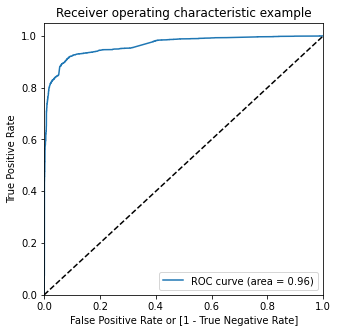

In [85]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

The area under **ROC curve** is **0.96** which is a very good value.

### Finding Optimal Cutoff Point

In [86]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.003820,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.175436,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.004450,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.162167,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.018384,3934,0,1,0,0,0,0,0,0,0,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    #print(total1)
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.796382  0.952960  0.699900
0.2   0.2  0.907081  0.925791  0.895552
0.3   0.3  0.915430  0.909976  0.918791
0.4   0.4  0.918677  0.893755  0.934033
0.5   0.5  0.913111  0.843877  0.955772
0.6   0.6  0.916203  0.821979  0.974263
0.7   0.7  0.914038  0.805353  0.981009
0.8   0.8  0.903680  0.770884  0.985507
0.9   0.9  0.884972  0.712490  0.991254


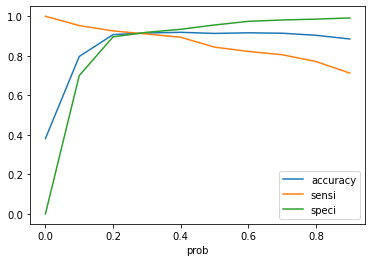

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From this graph, we can see that the optimal cut off is near to 0.3.

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.003820,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.175436,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.004450,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.162167,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.018384,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [90]:
# Adding lead score column to check the scores which we gain from train pred final.
y_train_pred_final['Lead_Score'] = y_train_pred_final["Converted_Prob"].map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.003820,1871,0,0
1,0,0.175436,6795,0,18
2,0,0.004450,3516,0,0
3,0,0.162167,8105,0,16
4,0,0.018384,3934,0,2


In [91]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.53896103896104

In [92]:
# Fetch the total of final predicted Conversion and non conversion numbers as per the converted column
Check_converted = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]

#Create a df to check their value counts
After_y_train_Pred_Final = Check_converted['final_predicted'].value_counts()[1]
print(Check_converted['final_predicted'].value_counts())
print("----------------------------")

# checking the percentage for correctly predicted based on the converted column.
After_y_train_Pred_Final = round(After_y_train_Pred_Final/float(len(Check_converted['final_predicted'].index))*100,2)
print("The converted percentage After_y_train_Pred_Final is",After_y_train_Pred_Final,"%")

1    2244
0     222
Name: final_predicted, dtype: int64
----------------------------
The converted percentage After_y_train_Pred_Final is 91.0 %


Here, we see that the converted percentage for train dataset is 91% which satisfies the business problem (having more than 80%).

In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.9154298082869512

In [94]:
# Creating confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
confusion1

array([[3677,  325],
       [ 222, 2244]], dtype=int64)

In [95]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [96]:
# Let's see the sensitivity
TP / float(TP+FN)

0.9099756690997567

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.9187906046976512

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is very good. We have the following values for the Train Data:

With **0.3** cutoff, we got **Accuracy, Sensitivity and Specificity** around and above **91%**.

## Prediction on Test dataset

## Missing Values

In [98]:
#Check for null values
round((X_test.isnull().sum()/len(X_test.index))*100,2).sort_values(ascending = False).head(10)

TotalVisits                                 1.37
Page Views Per Visit                        1.37
Tags_Graduation in progress                 0.00
Tags_in touch with EINS                     0.00
Tags_Will revert after reading the email    0.00
Tags_Ringing                                0.00
Tags_Others                                 0.00
Tags_Not doing further education            0.00
Tags_Lost to EINS                           0.00
Tags_Interested in other courses            0.00
dtype: float64

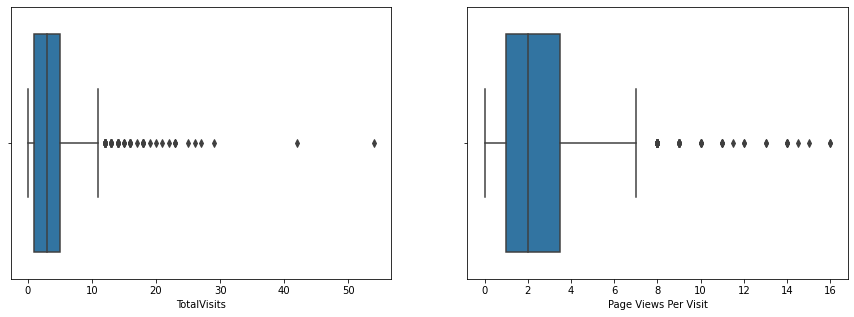

In [99]:
num = ["TotalVisits","Page Views Per Visit"]

plt.figure(figsize=(15, 5))
for var in num:
    plt.subplot(1,2,num.index(var)+1)
    sns.boxplot(x = var, data = X_test)
plt.show()

In [100]:
X_test["TotalVisits"] = X_test["TotalVisits"].fillna(X_test["TotalVisits"].mode()[0])
X_test["Page Views Per Visit"] = X_test["Page Views Per Visit"].fillna(X_test["Page Views Per Visit"].mode()[0])

In [101]:
#Check for null values
round((X_test.isnull().sum()/len(X_test.index))*100,2).sort_values(ascending = False)

TotalVisits                                 0.0
Tags_invalid number                         0.0
Tags_Will revert after reading the email    0.0
Tags_Ringing                                0.0
Tags_Others                                 0.0
                                           ... 
Last Activity_Unsubscribed                  0.0
Last Activity_Unreachable                   0.0
Last Activity_SMS Sent                      0.0
Last Activity_Page Visited on Website       0.0
Last Notable Activity_Unsubscribed          0.0
Length: 82, dtype: float64

## Feature Scaling

In [102]:
# Scaling numeric values
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(
    X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [103]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4269,0.031873,0.444982,0.145455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2376,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0.019920,0.025968,0.090909,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9199,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4359,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [104]:
# To get final features with cols of X_train
X_test_sm = X_test[col]

# To add a constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm

,const,Total Time Spent on Website,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Last Notable Activity_Modified
4269,1.0,0.444982,0,1,0,0,0,0,0,0,0,0,0
2376,1.0,0.000000,0,1,0,0,0,0,0,1,0,0,0
7766,1.0,0.025968,0,0,0,0,0,0,0,1,0,0,0
9199,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,1
4359,1.0,0.000000,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0.127641,0,0,0,0,0,0,0,0,0,0,0
2152,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0
7101,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0
5331,1.0,0.707746,0,0,0,0,0,0,0,0,0,0,1


In [105]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.794501
2376    0.991093
7766    0.934366
9199    0.018384
4359    0.928932
9186    0.996307
1631    0.982644
8963    0.950651
8007    0.029890
5324    0.992921
dtype: float64

In [106]:
# Converting y_test_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
4269,0.794501
2376,0.991093
7766,0.934366
9199,0.018384
4359,0.928932


In [107]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [108]:
# Putting Prospect id to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [109]:
# To remove index from both dataframes to concat them
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)

In [110]:
# Append y_pred_df and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.794501
1,1,2376,0.991093
2,1,7766,0.934366
3,0,9199,0.018384
4,1,4359,0.928932


In [111]:
# Renaming column 0
y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.794501
1,1,2376,0.991093
2,1,7766,0.934366
3,0,9199,0.018384
4,1,4359,0.928932


In [112]:
# Rearranging the columns and creating lead score column to check how the scores come up.
y_pred_final = y_pred_final[["Prospect ID","Converted","Converted_Prob"]]

y_pred_final['Lead_Score'] = y_pred_final["Converted_Prob"].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.794501,79
1,2376,1,0.991093,99
2,7766,1,0.934366,93
3,9199,0,0.018384,2
4,4359,1,0.928932,93


In [113]:
# Making prediction using cut off 0.3 from y_train
y_pred_final['Final_Predicted'] = y_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,Final_Predicted
0,4269,1,0.794501,79,1
1,2376,1,0.991093,99,1
2,7766,1,0.934366,93,1
3,9199,0,0.018384,2,0
4,4359,1,0.928932,93,1


In [114]:
# Fetch the total of final predicted Conversion and non conversion numbers as per the converted column
Check_converted = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_Predicted']]

#Create a df to check their value counts
After_y_Pred_Final = Check_converted['Final_Predicted'].value_counts()[1]
print(Check_converted['Final_Predicted'].value_counts())
print("----------------------------")

# checking the percentage for correctly predicted based on the converted column.
After_y_Pred_Final = round(After_y_Pred_Final/float(len(Check_converted['Final_Predicted'].index))*100,2)
print("The converted percentage with cutoff 0.3 After_y_Pred_Final is",After_y_Pred_Final,"%")

1    1013
0      82
Name: Final_Predicted, dtype: int64
----------------------------
The converted percentage with cutoff 0.3 After_y_Pred_Final is 92.51 %


Here, we see that the converted percentage for y_pred_final with cutoff 0.3 is 92.51% which is bit higher than train dataset (91%). And, both satisfy the business problem which should be above 80%.

In [115]:
# Check the accuracy
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["Final_Predicted"])

0.9170274170274171

In [116]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final_Predicted"])
confusion2

array([[1529,  148],
       [  82, 1013]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's calculate the sensitivity
TP / float(TP+FN)

0.9251141552511416

In [119]:
# Let us calculate specificity
TN / float(TN+FP)

0.9117471675611211

With **0.3** cutoff, we got **Accuracy (91%), Sensitivity (92.5%) and Specificity (91%)**.

## Precision and Recall of train set

In [120]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
confusion

array([[3677,  325],
       [ 222, 2244]], dtype=int64)

In [121]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.873491630984819

In [122]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9099756690997567

In [123]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [124]:
precision_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.873491630984819

In [125]:
recall_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.9099756690997567

## Precision and Recall Tradeoff

In [126]:
from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

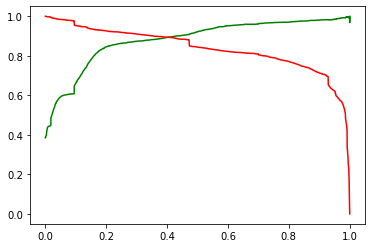

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.003820,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.175436,6795,0,1,1,0,0,0,0,0,0,0,0,0,18
2,0,0.004450,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.162167,8105,0,1,1,0,0,0,0,0,0,0,0,0,16
4,0,0.018384,3934,0,1,0,0,0,0,0,0,0,0,0,0,2


In [131]:
# Accuracy
metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])

0.9191403834260977

In [132]:
# Creating confusion matrix again
confusion3 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
confusion3

array([[3743,  259],
       [ 264, 2202]], dtype=int64)

In [133]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [134]:
# Let's calculate the sensitivity
TP / float(TP+FN)

0.8929440389294404

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9352823588205897

With **0.41** cutoff, **Accuracy is 91.9%, sensitivity is 89.2% and specificity is 93.5%**.

## Final Prediction on Test Dataset

In [136]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect id to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

# Remove index from both dataframes to concat them 
y_test_df.reset_index(drop=True, inplace=True)
y_pred_df.reset_index(drop=True, inplace=True)

# Append y_pred_df and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : "Converted_Prob"})
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.794501
1,1,2376,0.991093
2,1,7766,0.934366
3,0,9199,0.018384
4,1,4359,0.928932


In [137]:
# Rearranging the columns and creating lead score column to check how the scores come up.
y_pred_final = y_pred_final[["Prospect ID","Converted","Converted_Prob"]]

y_pred_final['Lead_Score'] = y_pred_final["Converted_Prob"].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,4269,1,0.794501,79
1,2376,1,0.991093,99
2,7766,1,0.934366,93
3,9199,0,0.018384,2
4,4359,1,0.928932,93


In [138]:
# Making prediction using cut off 0.41
y_pred_final["Final_Predicted"] = y_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Prospect ID,Converted,Converted_Prob,Lead_Score,Final_Predicted
0,4269,1,0.794501,79,1
1,2376,1,0.991093,99,1
2,7766,1,0.934366,93,1
3,9199,0,0.018384,2,0
4,4359,1,0.928932,93,1
...,...,...,...,...,...
2767,8649,0,0.137922,14,0
2768,2152,1,0.472342,47,1
2769,7101,0,0.095149,10,0
2770,5331,0,0.161008,16,0


In [139]:
# Fetch the total of final predicted Conversion and non conversion numbers as per the converted column
Check_converted = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','Final_Predicted']]

#Create a df to check their value counts
After_y_Pred_Final = Check_converted['Final_Predicted'].value_counts()[1]
print(Check_converted['Final_Predicted'].value_counts())
print("----------------------------")

# checking the percentage for correctly predicted based on the converted column.
After_y_Pred_Final = round(After_y_Pred_Final/float(len(Check_converted['Final_Predicted'].index))*100,2)
print("The converted percentage with cutoff 0.41 After_y_Pred_Final is",After_y_Pred_Final,"%")

1    990
0    105
Name: Final_Predicted, dtype: int64
----------------------------
The converted percentage with cutoff 0.41 After_y_Pred_Final is 90.41 %


Here, we see that the converted percentage for y_pred_final with cutoff 0.41 is 90.41% which is almost equal to train dataset (91%). And, both satisfy the business problem which should be above 80%.

In [140]:
# Accuracy
metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["Final_Predicted"])

0.9163059163059163

In [141]:
# Creating confusion matrix again
confusion4 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final_Predicted"])
confusion4

array([[1550,  127],
       [ 105,  990]], dtype=int64)

In [142]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [143]:
# Let's calculate the sensitivity
TP / float(TP+FN)

0.9041095890410958

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9242695289206917

In [145]:
# Precision = TP / TP + FP
confusion4[1,1]/(confusion4[0,1]+confusion4[1,1])

0.8863025962399284

In [146]:
#Recall = TP / TP + FN
confusion4[1,1]/(confusion4[1,0]+confusion4[1,1])

0.9041095890410958

In [147]:
precision_score(y_pred_final["Converted"], y_pred_final["Final_Predicted"])

0.8863025962399284

In [148]:
recall_score(y_pred_final["Converted"], y_pred_final["Final_Predicted"])

0.9041095890410958

With **0.41** cutoff, **Accuracy is 91.6%, sensitivity is 90.4% and specificity is 92.4%**.

## Conclusions

#### From **EDA** we found that

**Google** tops the list followed by **Direct Traffic** in sources of information.                                      
People looking for such portals are mainly **Unemployed** followed by **Working Professional**.                                 Most of them are from **Mumbai**.                                                                                              
Most of them did not want a **free copy of mastering interview** though they are few said **yes**.                        
Most of them have **modified** the **last notable activity** and some are **email opened** and **sms sent**.                 
Their **last activity** is **email opened** followed by **sms sent** and others.                                            
Their **Specialization** is mainly for **Finance Management** followed by many which are almost equal like **Human Resource Management** and **Marketing Management**. Seems like all management courses top the list.                                     
And, most of them have **tags** with **Will revert after reading the email** and **Ringing**. This could be the reason why people either get converted or not. We need to see in the bivariate analysis with the target variable later.

So, targetting these people may increase the conversions.


#### From our model, we found that

**Total Time Spent on Website** - this has positive coeff (**3.2878**). So, targetting those spend more time helps.


**Tags_Will revert after reading the email** - this has positive coeff (**4.8227**). So, do follow up with those people.


**Last Activity_SMS Sent** - this has positive coeff (**2.1416**). So,sending sms works.


**Last Notable Activity_Modified** - this has negative coeff (**-1.7254**). So, this does not help.


**Tags_Ringing** - this has negative coeff (**-3.3114**). So, stop following up with those who dont pick the call.


**Tags_Interested in other courses** - this has negative coeff (**-1.4426**). So, if they say interested in other courses, they are a liability.


**Tags_Closed by Horizzon** - this has positive coeff (**8.2032**). So, targetting these will help.


**Tags_Lost to EINS** - this has positive coeff (**6.4640**). So, targetting these will help.


**Lead Source_Welingak Website** - this has positive coeff (**5.2821**). So, So, targetting these will help.


**Tags_Not doing further education** - this has negative coeff (**-2.7763**). So, they seem like not interested.


**Tags_switched off** - this has negative coeff (**-3.5675**). So, they might have blocked the numbers. So, ignore them.


**Tags_invalid number** - this has negative coeff (**-3.8781**). So, they might have blocked the numbers. So, ignore them.